# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** Since we want to identify if a student may or may not need intervention, we have a binary discret output and, therefore, one can classify it as a classification problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

student_data.head()

Student data read successfully!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [12]:
# TODO: Calculate number of students
n_students = len(student_data.ix[:,-1])

# TODO: Calculate number of features
n_features = len(student_data.ix[1,:-1])

# TODO: Calculate passing students
n_passed = len(student_data[student_data['passed'] == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data['passed'] == 'no'])

# TODO: Calculate graduation rate
grad_rate = float(n_passed)/float(n_students)*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [2]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


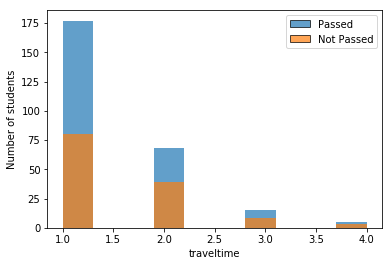

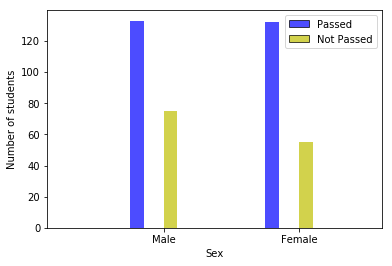

In [3]:

def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

# Graph the features
import matplotlib.pyplot as plt
%matplotlib inline

# Properties histogram. I wanted to play a little with the data visualization for curiosity
Passed = X_all[y_all == 'yes']
Not_Passed = X_all[y_all == 'no']

Choosed_feature = 'traveltime'
plt.hist(Passed[Choosed_feature],alpha=0.7)
plt.hist(Not_Passed[Choosed_feature],alpha=0.7)
plt.legend({'Passed','Not Passed'})
plt.xlabel(Choosed_feature)
plt.ylabel('Number of students')
plt.show()

# Gender
plt.hist(Passed['sex_F'][(Passed['sex_F'] == 1)],alpha=0.7,color='b')
plt.hist(Not_Passed['sex_F'][(Not_Passed['sex_F'] == 1)]+0.25,alpha=0.7,color='y')

plt.hist(Passed['sex_M'][(Passed['sex_M'] == 1)]+1,alpha=0.7,color='b')
plt.hist(Not_Passed['sex_M'][(Not_Passed['sex_M'] == 1)]+1.25,alpha=0.7,color='y')

plt.legend({'Passed','Not Passed'})
plt.xlabel('Sex')
plt.ylabel('Number of students')
plt.xticks([1.25,2.25],{'Female','Male'})
plt.show()




### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [4]:
from sklearn.model_selection import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
#X_train = None
#X_test = None
#y_train = None
#y_test = None

# Covert to numeric already in the beggining
y_all = y_all.replace(['yes', 'no'], [1, 0])
X_all = X_all.values

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, train_size=num_train,random_state=1011010)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


# Check how much the features dimensionality are really important (curiosity)
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_all)
print(pca.explained_variance_ratio_) 


Training set has 300 samples.
Testing set has 95 samples.
[ 0.77491455  0.03418989  0.02801583  0.02369683  0.01698655  0.01391185
  0.01079184  0.00857924  0.00787206  0.0068158 ]


In [13]:
X_test_csv = pd.DataFrame(X_test)
X_test_csv.to_csv('X_test.csv',index=False)

X_all_csv = pd.DataFrame(y_test)
X_all_csv.to_csv('y_test.csv',index=False)

X_afall_csv = pd.DataFrame(X_train)
X_afall_csv.to_csv('X_train.csv',index=False)

X_algrl_csv = pd.DataFrame(y_train)
X_algrl_csv.to_csv('y_train.csv',index=False)

## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: ** The selected models were: SVM, K-Nearest Neighbors and Random forest.

**SMV:** The SVM is very nice to make a good separation for the labels maximizing the margin between the decision boundary and can work even with non linear boundarys with the flexibility of a well chosed kernel. It performs well when there's not so much noise in the data and the data set is not so big (because the calculation time grows cubic) and the selected kernel is appropriate for the problem. Since the data is somewhat controled (a school system) as well as the features aren't so much prone to error (Sex,Age,Family size,etc), the data set could be said to not have so much noise and is also not so big , therefore SVM seems a reasonable choice for the problem if we are able to play a little with the kernels. One industrial use of the SVM is in Chemistry, as drug design, chemometrics, chemical engineering etc. **Source: Applications of Support Vector Machines in Chemistry. link: http://www.ivanciuc.org/Files/Reprint/Ivanciuc_Applications_of_Support_Vector_Machines_in_Chemistry.pdf. 10/05/2016**


**K-Nearest Neighbors:** KNN makes the assumption that samples with similar features have similar classes, it is very simple, both to implement as also to explain and has the advantage of easily adapting to new data, it performs very well when the dimensionality i.e number of features is not so high. When the features are too many, however, it becomes hard to find similar points near each other and the quantity of necessary points for it becomes exponentially larger with the number of features. I believe this is a good cadidate for the problem because the number of features is not so high, and it is reasobable to think that students that don't pass could have some similarities like small studying time, higher number of failures, longer time to get to school and so on. It is also quick and don't demands so much computational power. One industrial use of KNN is Fault Detection in semiconductor manufacture. **Source: Fault Detection Using the k-Nearest Neighbor Rule for Semiconductor Manufacturing Processes. link: https://www.researchgate.net/publication/3284325_Fault_Detection_Using_the_k-Nearest_Neighbor_Rule_for_Semiconductor_Manufacturing_Processes. 10/05/2016 **

**Random forest: ** The use of a decision trees emsemble can reduce the overfit with a high number of learners, which is a negative feature of decision trees alone, it can however still overfit, specially when the data is much noisy or has a lot of features with not so many samples. A Random forest can adapat to both linear and non linear separable data and can be also somewhat easily interpreted(http://blog.datadive.net/random-forest-interpretation-with-scikit-learn/ . in 6/10/2016). As I don't know how the decision boundaries from that data are, an algorithm that adapts to any of them is a reasonable choice, and since, as said before, the data can be expect to not have so much noise, it seems a nice choice for that problem if the other ones that need less computation cost don't work so well. One industrial use of Random forest is mapping and exploring of forest (haha) extends through satellite data. **Source: The Performance of Random Forests in an Operational Setting for Large Area Sclerophyll Forest Classification. link: https://www.google.com.br/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&cad=rja&uact=8&ved=0ahUKEwizusn10sTPAhVEDZAKHUiHD_sQFggqMAE&url=http%3A%2F%2Fwww.mdpi.com%2F2072-4292%2F5%2F6%2F2838%2Fpdf&usg=AFQjCNHJuyBZpTxi6HqbheGVEFLkjcKt6A&sig2=ZEDOTjIB6HwNMfxvi6lg0A&bvm=bv.134495766,d.Y2I. 10/05/2016 **



### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [17]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target, y_pred) #, pos_label='yes'


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    
    Error_train = predict_labels(clf, X_train, y_train)
    Error_test = predict_labels(clf, X_test, y_test)
    return Error_train,Error_test

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

SVM
     100
Training a SVC using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9265.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7500.
Made predictions in 0.0010 seconds.
Made predictions in 0.0010 seconds.
     200
Training a SVC using a training set size of 200. . .
Trained model in 0.0030 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.9078.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7843.
Made predictions in 0.0020 seconds.
Made predictions in 0.0010 seconds.
     300
Training a SVC using a training set size of 300. . .
Trained model in 0.0050 seconds
Made predictions in 0.0050 seconds.
F1 score for training set: 0.8821.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7949.
Made predictions in 0.0050 seconds.
Made predictions in 0.0020 seconds.

Random Forest
     100
Training a RandomForestClassifier using a training set size 

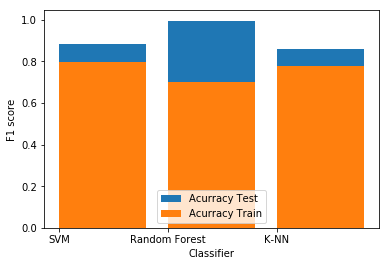

In [19]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# TODO: Initialize the three models
clf_A = SVC(random_state = 23)
clf_B = RandomForestClassifier(random_state = 23)
clf_C = KNeighborsClassifier() 

# TODO: Set up the training set sizes
X_train_100 = X_train[0:100,:]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200,:]
y_train_200 = y_train[:200]

X_train_300 = X_train
y_train_300 = y_train

# TODO: Execute the 'train_predict' function for each classifier and each training set size
Error_train = np.zeros((3,3))
Error_test = np.zeros((3,3))

# SVM
print 'SVM'
print '     100'
Error_train[0,0],Error_test[0,0] = train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
print '     200'

Error_train[0,1],Error_test[0,1] = train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
print '     300'

Error_train[0,2],Error_test[0,2] = train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)

print''
# Random Forest
print 'Random Forest'
print '     100'

Error_train[1,0],Error_test[1,0] =  train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
print '     200'

Error_train[1,1],Error_test[1,1] = train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
print '     300'

Error_train[1,2],Error_test[1,2] = train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
print''

# KNN
print 'K-NN'
print '     100'

Error_train[2,0],Error_test[2,0] = train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
print '     200'

Error_train[2,1],Error_test[2,1] = train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
print '     300'

Error_train[2,2],Error_test[2,2] = train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(np.array([1,2,3]),Error_train[:,2])
plt.bar(np.array([1,2,3]),Error_test[:,2])
plt.xticks([1,2,3],{'SVM','Random Forest','K-NN'})
plt.legend({'Acurracy Train','Acurracy Test'},loc='lower center')
plt.ylabel('F1 score')
plt.xlabel('Classifier')
plt.show()


#y_score_svm = clf_A.fit(X_train_300,y_train_300.decision_function(X_test))

#y_score = clf_C.predict_proba(X_test)#.decision_function(X_test)
#fpr, tpr, _ = roc_curve(y_test,y_score[:,1])
#roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#plt.figure()
#lw = 2
#plt.plot(fpr, tpr, color='darkorange',
#         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
#plt.legend(loc="lower right")
#plt.show()

#print fpr,tpr

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVM**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |            0.001             |      0.001                  |     0.9265             |     0.75            |
| 200               |        0.003          |             0.001           |     0.9078             |      0.7843           |
| 300               |          0.005               |       0.001                 |     0.8821             |    0.7949      |

** Classifer 2 - Random Forest**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.02                  |      0.007                  |     0.9992             |     0.687            |
| 200               |     0.021            |         0.008               |       0.9888           |      0.7218           |
| 300               |       0.023                  |         0.007               |     0.995             |     0.7015     |

** Classifer 3 - K-NN **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0                   |      0.002                  |   0.8759              |    0.6906             |
| 200               |     0                    |       0.003                 |    0.8881              |    0.7391             |
| 300               |       0.2                  |       0.003                 |      0.8584            |    0.755             |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

 **note**: I wouldn't feel good in choosing the 'best' model with just a default parameter test, I don't think it can give enough information in the sense of which model is the best, to a real and concise answer to that matter, I believe one would have to test the best possible outcome for each model, but since that is not the goal of the question, I will answer as in supporting the best test outcome. 

**Answer: ** "Well, before we even start to analyze the results we need to define what is important and what is not to define the best model. We should divide our available data in train and testing, so we can check how well our model can generalize, and since train score is very prone to overfit, the test score should be used as an evaluator for the accuracy and performance of our model.The training time has not so much importance as long as it is not absurdly long, because it will only be calculated once, therefore the prediction time should be used, reducing it the most will led us to less cost and less use of resources. Looking at the results we can cleary perceive that the SVM is better both in the accuracy as also in the prediction time, giving the best perfomace and lower cost, therefore it seems as the most reasonable choice for that problem. "

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** "Well, the chosen model was trained to better distinguish the students who need and who don't need an intervention, the 'needness' factor was labeled as if the student has passed or not. Having them labeled, the algorithm was looking for all the similarities for each group, if they've failed too many exams, have too many absences and so on. Having that similarity, the algorithm has two main 'blocks', one block representing the big majority of students who need intervention and the other one the ones who don't. The algorithm then do its best to separate then with the biggest possible margin, i.e, making the biggest distance between the closests members between blocks while maintain accuracy. So every time a new student comes, the algorithm takes its properties and depending of which block the student is, it will be labeled accordingly.  Those blocks are not exact, in fact, more or less 80% exact in our test. Supposing that the numbers would stay the same, if we consider that we will help 80% of the 33% students who failed, that's equal to 26.4%, plus the 67% who passed, we will have a completion rate of 93.4%. This 1.6% from the wished value can easily come with the variance of the enviroment/students, so I would guess that, if a not so different proportion, the completion rate would stay in between 91% and 96%, way better than the actual 67% and within the wished ratio."

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [30]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import preprocessing
# TODO: Create the parameters list you wish to tune
parameters = {'kernel':('linear', 'rbf'), 'C':[1e-2,1, 10,20,50,100],'gamma': [1e-6,1e-4,1e-5,1,10]}

# Normalize data
normalizer = preprocessing.Normalizer(norm='l1').fit(X_train)

X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)


clf = SVC(random_state = 23)#svm.SVC(random_state = 23)#

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters

grid_obj = grid_obj.fit(X_train_norm,y_train)


# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train_norm, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test_norm, y_test))

Made predictions in 0.0020 seconds.
Tuned model has a training F1 score of 0.8365.
Made predictions in 0.0010 seconds.
Tuned model has a testing F1 score of 0.8000.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** For the training set we have a F1 score that went from 0.8821 to 0.8365 and for the test set we went from 0.7949 to 0.8. In general the improvement in the testing set wasn't so big, we see, however, that the gap betweem test and train has reduced and therefore it can indicates that the model has become more robust in respect to generalization, with an more constant accuracy.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.